Dylan Liesenfelt

# Task: Design The Sequential Circuit

1. State Diagram Analysis:

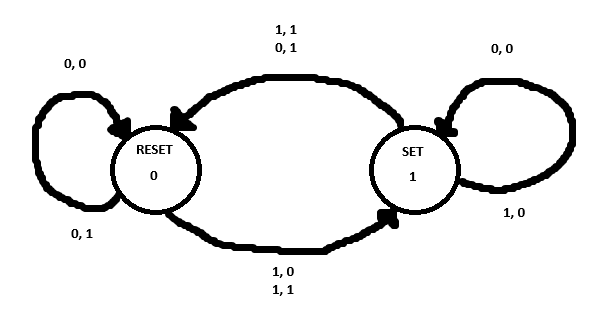

2. State Table:

![Screenshot 2024-07-26 131717.png](<attachment:Screenshot 2024-07-26 131717.png>)

3. Circuit Diagram:

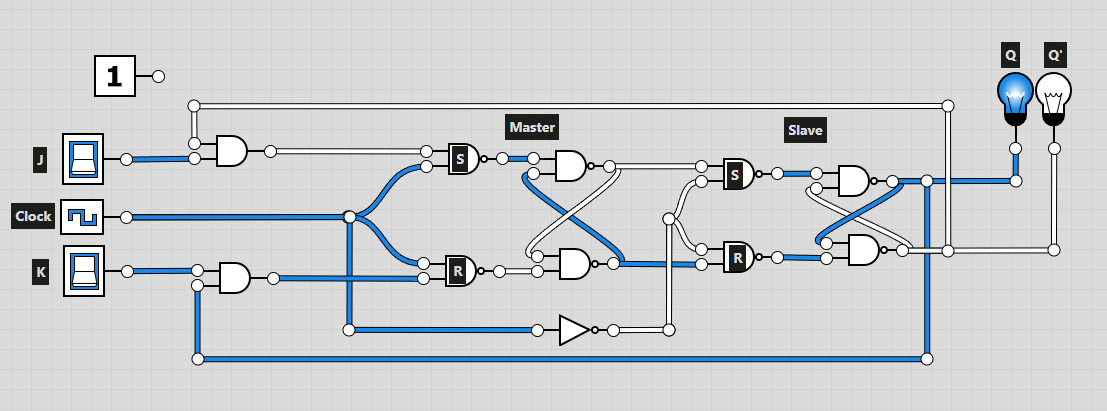
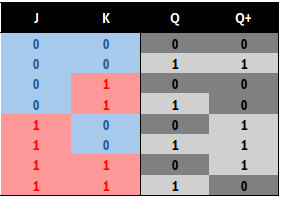

# Task: Simulate The Circuit

1. VHDL Code:

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity JKFlipFlop is
    port (
        J, K, CLOCK : in std_logic;
        Q, Qbar : out std_logic
    );
end JKFlipFlop;

architecture Behavioral of JKFlipFlop is
    signal Q_internal : std_logic := '0';
begin

    process (CLOCK)
    begin
        if rising_edge(CLOCK) then
            if (J = '0' and K = '0') then
                Q_internal <= Q_internal; -- No change
            elsif (J = '0' and K = '1') then
                Q_internal <= '0'; -- Reset
            elsif (J = '1' and K = '0') then
                Q_internal <= '1'; -- Set
            elsif (J = '1' and K = '1') then
                Q_internal <= not Q_internal; -- Toggle
            end if;
        end if;
    end process;

    Q <= Q_internal;
    Qbar <= not Q_internal;

end Behavioral;

2. Test Bench:

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

-- TESTBENCH ENTITY
entity testbench is
--empty
end testbench;

architecture tb of testbench is
-- DUT COMPONENT
component JKFlipFlop is
port(
    J, K, CLOCK: in std_logic;
    Q, Qbar: out std_logic);
end component;

signal Jin, Kin, CLOCKin: std_logic := '0';
signal Qout, QBARout: std_logic;

constant clk_period : time := 10 ns;

begin

-- CONNECT DUT
DUT: JKFlipFlop port map(Jin, Kin, CLOCKin, Qout, QBARout);

    clk_process: process
    begin
        while now < 100 ns loop
            CLOCKin <= '0';
            wait for clk_period/2;
            CLOCKin <= '1';
            wait for clk_period/2;
        end loop;
        wait;
    end process;

    stim_proc: process
    begin
        wait for 2 ns;

        Jin <= '0';
        Kin <= '0';
        wait for clk_period;

        Jin <= '0';
        Kin <= '1';
        wait for clk_period;

        Jin <= '0';
        Kin <= '0';
        wait for clk_period;

        Jin <= '1';
        Kin <= '0';
        wait for clk_period;

        Jin <= '0';
        Kin <= '0';
        wait for clk_period;

        Jin <= '1';
        Kin <= '1';
        wait for clk_period;

        wait;
    end process;
end tb;

3. Simulation:

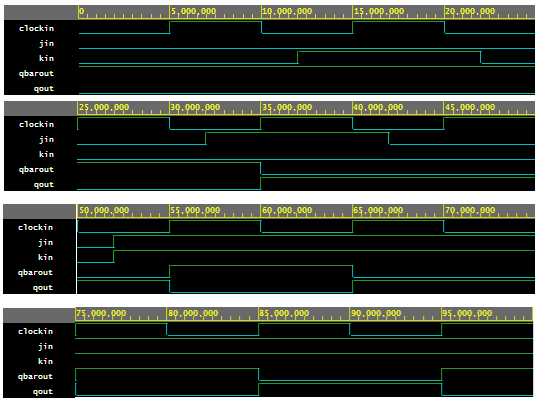